**Uploading a Google Sheet from Google Drive**

To work with data stored in Google Sheets, we need to connect our Colab environment to Google Drive.

***Authenticate and Connect to Google Drive***

In [ ]:
from google.colab import auth
from google.auth import default
import gspread

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Authenticate and create PyDrive client
auth.authenticate_user()

#Connect to Google Sheets
gc = gspread.authorize(default()[0])

**Load Data from a Google Sheet**

In [ ]:
sheet_id = '1MuNGHi260NORByWd8iAenCEFZIx26UVhtpYRPxiseMY'
sheet = gc.open_by_key(sheet_id)

#Select worksheet in the Google Sheet
worksheet = sheet.get_worksheet(0)

#Convert worksheet to a pandas DataFrame
data = pd.DataFrame(worksheet.get_all_records())

**Overview of the Data**

In [ ]:
# Display the first few rows of the DataFrame
data.head()

,Full Name,Reg_no,Branch,Class_id,Year,Month of Registration,Class Start Month,Class Start Date
0,Zubeda Hamisi Said,24-1512,Mombasa,Batch 5 2024 Morning_Mombasa,2024,September,September,September 09
1,Zipporah Wothaya Njau,24-1426,Nairobi,Batch 3 2024 Saturday Eldercare_Nairobi,2024,August,August,August 31
2,Zipporah Waithera Njuguna,24-0620,Nairobi,Batch 2 2024 Afternoon_Nairobi,2024,March,March,March 11
3,Ziporah Koyudi Khalimesi,24-1138,Nairobi,Batch 3 2024 Morning_Nairobi,2024,June,June,June 10
4,Zilda Wakesho,24-0278,Mombasa,Batch 1 2024 Morning_Mombasa,2024,January,January,January 15


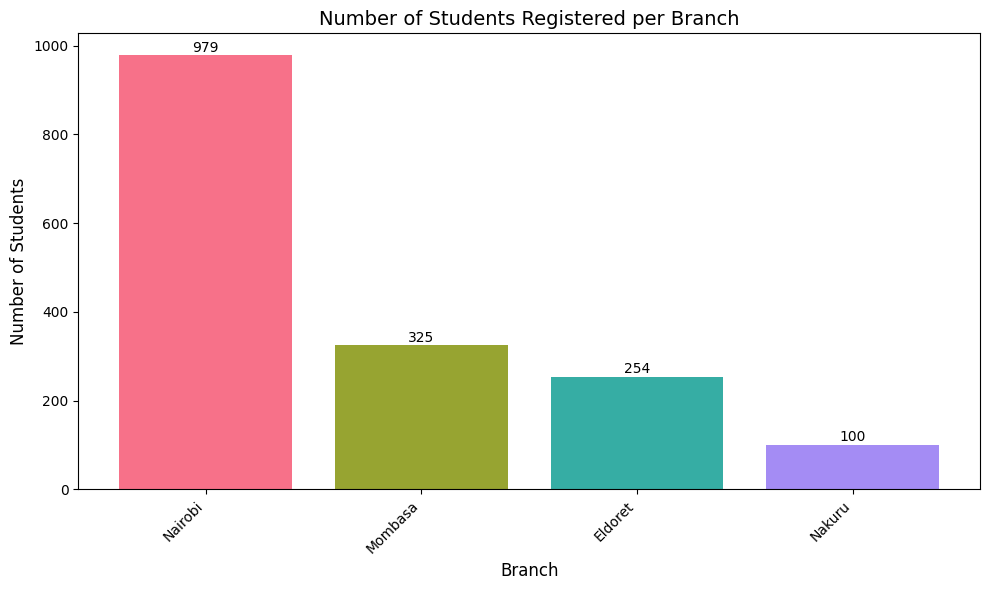

In [ ]:
# Count the number of students per branch
branch_counts = data['Branch'].value_counts()

# Create a bar plot with colorful bars and data labels
plt.figure(figsize=(10, 6))
bars = plt.bar(branch_counts.index, branch_counts.values, color=sns.color_palette("husl", len(branch_counts)))
plt.xlabel("Branch", fontsize=12)
plt.ylabel("Number of Students", fontsize=12)
plt.title("Number of Students Registered per Branch", fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, yval, ha='center', va='bottom', fontsize=10)

plt.tight_layout() #Adjust layout to prevent labels from overlapping
plt.show()

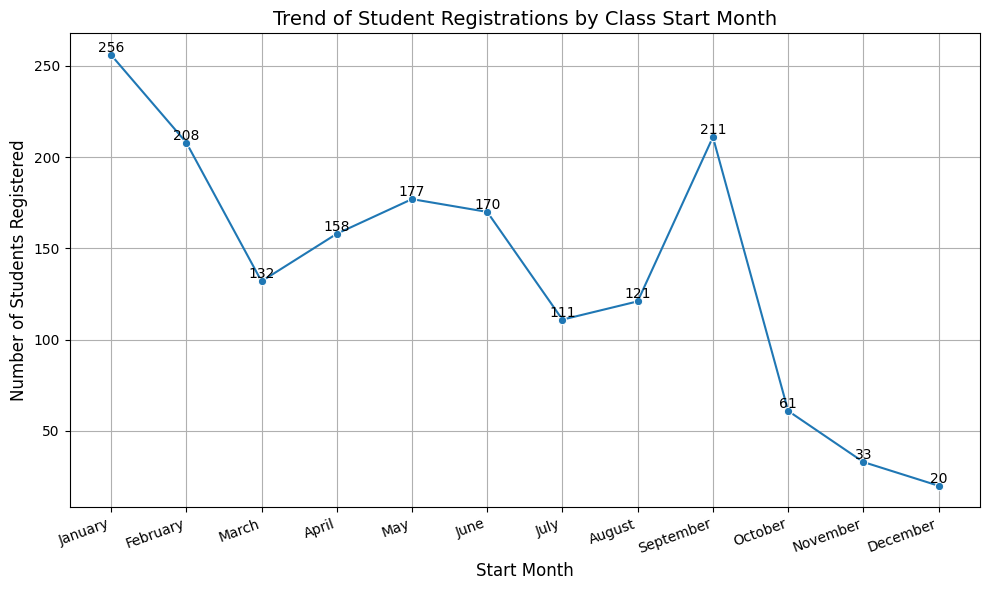

In [ ]:
import calendar

# Convert 'Class Start Month' to datetime objects, handling errors
data['Class Start Month'] = pd.to_datetime(data['Class Start Month'], errors='coerce', format='%B')

# Extract the month from the datetime objects
data['Start Month'] = data['Class Start Month'].dt.month

# Group the data by month and count the number of students
monthly_registrations = data.groupby('Start Month')['Reg_no'].count()

# Create the trend chart
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x=monthly_registrations.index, y=monthly_registrations.values, marker='o') # Assign the plot to 'ax'
plt.xlabel('Start Month', fontsize=12)
plt.ylabel('Number of Students Registered', fontsize=12)
plt.title('Trend of Student Registrations by Class Start Month', fontsize=14)

# Get month names and order them from January
month_names = list(calendar.month_name[1:])
plt.xticks(monthly_registrations.index, [month_names[i - 1] for i in monthly_registrations.index], rotation=20, ha='right')  # Rotate x-axis labels

# Add data labels
for x, y in zip(monthly_registrations.index, monthly_registrations.values):
    ax.text(x, y, str(y), ha='center', va='bottom')

plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


In [ ]:
import plotly.express as px

# Group data by branch and start month, then count registrations
trend_data = data.groupby(['Branch', 'Start Month'])['Reg_no'].count().reset_index()

# Create an interactive line chart using Plotly
fig = px.line(trend_data,
              x='Start Month',
              y='Reg_no',
              color='Branch',
              markers=True,
              labels={'Start Month': 'Start Month', 'Reg_no': 'Number of Registrations', 'Branch': 'Branch'},
              title='Trend of Student Registrations by Class Start Month and Branch')

# Update x-axis ticks to display month names
month_names = list(calendar.month_name[1:])
fig.update_xaxes(tickvals=trend_data['Start Month'].unique(),
                 ticktext=[month_names[i - 1] for i in trend_data['Start Month'].unique()])

fig.show()